In [1]:
# Import matplot for plotting later on
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Specify the path to our data
dataPath = "../../data/"

In [3]:
# Walk the data folder, returning a list of all the files
import os
for root, dirs, files in os.walk(dataPath, topdown=False):
   for file in files:
        file = os.path.join(root, file)
print("files retrieved")

files retrieved


In [4]:
# Library for working with raster images
import rasterio
from rasterio import plot

In [5]:
# Create a list of all the raster images
rasterBin = []
for file in files:
    if ".hdr" not in file:
        rasterBin.append(os.path.join(dataPath, file))

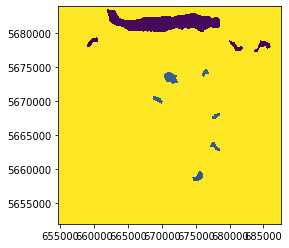

In [6]:
for raster in rasterBin:
    if "S2A.bin_4x.bin_sub.bin" in raster:
        
        # rasterImage is of type rasterio.io.DatasetReader
        dataset = rasterio.open(raster)     
        
        bandContainer = []
        
        # store every band
        for x in range(dataset.count):
            bandContainer.append(dataset.read(x+1))

    elif "WATERSP.tif_project_4x.bin_sub.bin" in raster:
        waterTruthImage = rasterio.open(raster)
        
        # This is the TRUTH label vis
        plot.show(waterTruthImage)
    

In [7]:
import numpy as np
temp_X = np.ones((401, 410, 12))

for idx, band in enumerate(bandContainer):
    temp_X[:,:,idx] = band


In [8]:
# sklearn wants a 2d structure coming in
# Here we will create a 2d list, and loop
# through the entire image, saving each 
# list of 12 values in an unique index 
# of the list X
# Essentially, this is 'like' np.ravel(X[:,:])
x, y, z = temp_X.shape

X = [[]]
print("Creating X")
for row in range(x):
    for col in range(y):
        
        values = temp_X[row,col,:] # values is np array
        X.append(list(values)) # convert to a list and append

Creating X


In [9]:
X = [x for x in X if x != []] # remove the initial empty list

# X is now a list of a list, with each index corresponding to
# a 'feature vector' consisting of 12 values, each a specific
# value from each of the 12 bands in the raster

print("X created")

X created


### Now we need to create a map for our water pixels, should be a matrix of 1 (for true water) and 0 (false water)


In [10]:
# Convert the DatasetReader into a nparray
arr = waterTruthImage.read(1)

401 410


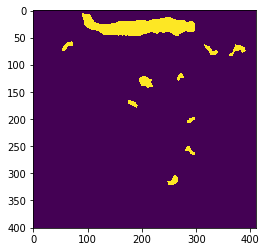

Raveling y
y's new shape (164410,)


In [11]:
dim1, dim2 = arr.shape
print(dim1, dim2)
y_predict = np.ones((dim1, dim2))

for x1 in range(dim1):
    for y1 in range(dim2):
        value = arr[x1,y1]
        if(value != 128):
            y_predict[x1,y1] = 1
        else:
            y_predict[x1,y1] = 0

plot.show(y_predict)

print("Raveling y")
y_predict = np.ravel(y_predict)
print("y's new shape", y_predict.shape)

In [21]:
# Some metrics for our raw data
waterPixels = np.count_nonzero(y_predict)
totalSamples = len(X)
nonWaterPixels = totalSamples - waterPixels

print("Number of water pixels:", waterPixels)
print("Number of nonwater pixels", nonWaterPixels)
print("Percentage of water", trueSamples/totalSamples)

Number of water pixels: 6624
Number of nonwater pixels 157786
Percentage of water 0.04028952010218356



### So, we're going to have to manipulate the sample so we don't run into imbalanced classes

In [99]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X,y_predict)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [281]:
import numpy as np
from sklearn import linear_model
X = np.array([[-1, -1,1,1,1,1,1,1], [-2, -1,1,1,1,1,1,1], [1, 1,1,1,1,1,1,1], [2, 1,1,1,1,1,1,1]])
Y = np.array([1, 1, 2, 2])
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)